# All figures of the paperdraft

In [1]:
import json
from pathlib import Path
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib.gridspec import GridSpec
import os

from cycler import cycler
# Color blind safe from here https://sronpersonalpages.nl/~pault/
# tol_bright_colors = ['#4477AA', '#66CCEE', '#228833', '#CCBB44', '#EE6677', '#AA3377', '#BBBBBB'][::2]
tol_bright_colors = ['#4477AA', '#228833', '#CCBB44', '#EE6677', '#AA3377']
plt.rc('axes', prop_cycle=cycler('color', tol_bright_colors))


def get_experiment_base_path():
    notebook_dir = Path(os.path.dirname(os.path.abspath("__file__")))
    experiment_base_path = notebook_dir / "../experiments/"
    return experiment_base_path

def get_output_fig_path():
    notebook_dir = Path(os.path.dirname(os.path.abspath("__file__")))
    output_fig_path = notebook_dir / "../figures/"
    return output_fig_path



with open(get_experiment_base_path() / 'paperdraft.json', 'r') as f:
    experiment_dict = json.load(f)

def get_experiment_path(experiment):
    return get_experiment_base_path() / experiment_dict[experiment]['experiment_path']

def get_metrics_dict(experiment):
    with open(get_experiment_path(experiment) / 'ensemble_metrics.json', 'r') as f:
        return json.load(f)


## Figure Performance

In [2]:
## The trained 6 cycle versions

test_predictions_90d_sixcycles = xr.open_dataset( get_experiment_path('028') / 'ensemble_predictions.nc').mean('member')
test_predictions_365d_sixcycles = xr.open_dataset( get_experiment_path('029') / 'ensemble_predictions.nc').mean('member')


/tmp/ipykernel_99699/2850878288.py:195: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


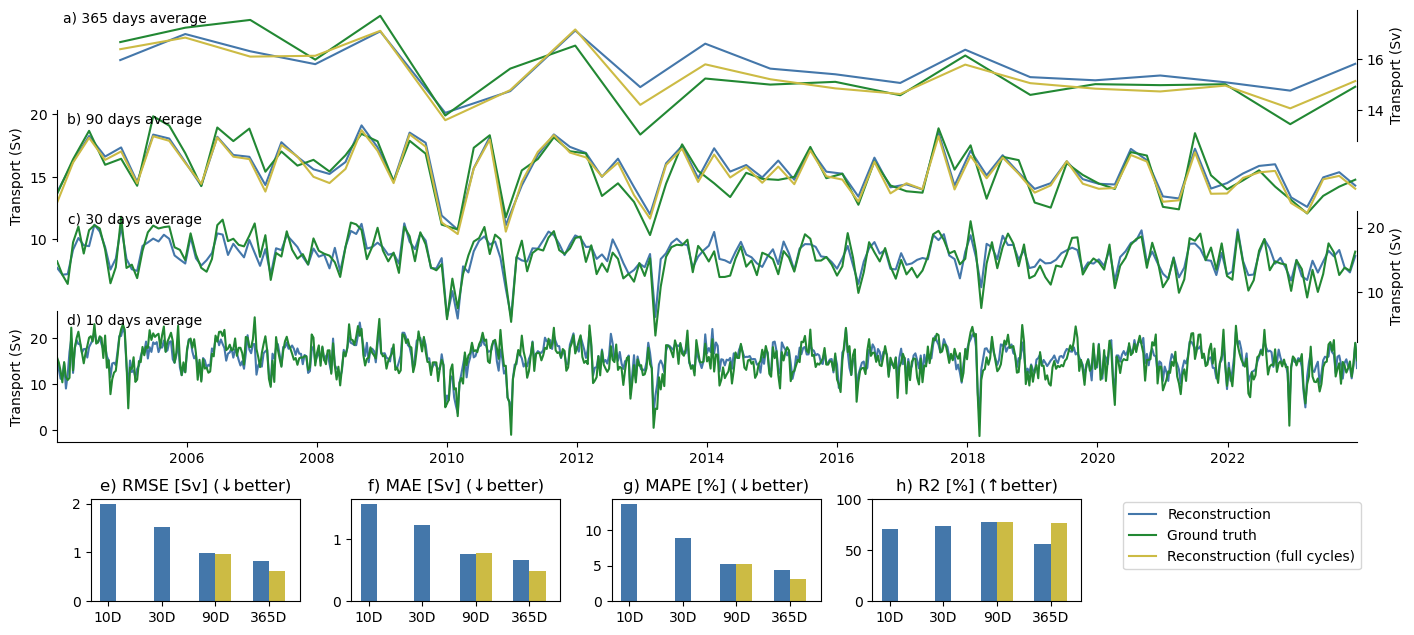

In [3]:


test_predictions_10d = xr.open_dataset(get_experiment_path('001') / 'ensemble_predictions.nc').mean('member')
test_predictions_30d = xr.open_dataset(get_experiment_path('002') / 'ensemble_predictions.nc').mean('member')
test_predictions_90d = xr.open_dataset(get_experiment_path('003') / 'ensemble_predictions.nc').mean('member')
test_predictions_365d = xr.open_dataset(get_experiment_path('004') / 'ensemble_predictions.nc').mean('member')



axes_width = .6

min_time = min(
    test_predictions_10d.time.min(),
    test_predictions_30d.time.min(),
    test_predictions_90d.time.min(),
    test_predictions_365d.time.min(),

)

max_time = max(
    test_predictions_10d.time.max(),
    test_predictions_30d.time.max(),
    test_predictions_90d.time.max(),
    test_predictions_365d.time.max(),
)

fig = plt.figure(figsize=(13,6))


base_height = .33
overlap_percentage = .1
delta = (1 - base_height)


height_per_plot = delta * (1 + 3 * overlap_percentage) / 4


gs = GridSpec(2,5, figure=fig, height_ratios=[4,1])
ax = fig.add_axes([0, base_height + (delta / 4) * 0, 1, height_per_plot])

ax.plot(test_predictions_10d.time, test_predictions_10d.test_predictions, label = 'Reconstruction (Argo 2000m)')
ax.plot(test_predictions_10d.time, test_predictions_10d.test_gt_transport, label='Ground truth')


# remove the x-axis and also the border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)

# ax.set_xticks([])

# ax.legend(loc = 'lower right')

label_y = .93
ax.set_xlim(min_time.values, max_time.values)
ax.text(0.06, label_y, 'd) 10 days average', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)


ax.set_ylabel('Transport (Sv)')


ax = fig.add_axes([0, base_height + (delta / 4) * 1, 1, height_per_plot])


ax.plot(test_predictions_30d.time, test_predictions_30d.test_predictions, label = 'Reconstruction')
# ax.plot(test_predictions_deep_30d.time, test_predictions_deep_30d.test_predictions, label='Reconstruction (Deep Argo)')
ax.plot(test_predictions_30d.time, test_predictions_30d.test_gt_transport, label='Ground truth')


# remove the x-axis and also the border
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([])
ax.set_xlim(min_time.values, max_time.values)
ax.text(0.06, label_y, 'c) 30 days average', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

#set y axis on right
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.set_facecolor('none')
ax.set_ylabel('Transport (Sv)')

ax = fig.add_axes([0, base_height + (delta / 4) * 2, 1, height_per_plot])

ax.plot(test_predictions_90d.time, test_predictions_90d.test_predictions, label = 'Reconstruction')
# ax.plot(test_predictions_deep_90d.time, test_predictions_deep_90d.test_predictions, label='Reconstruction (Deep Argo)')
ax.plot(test_predictions_90d.time, test_predictions_90d.test_gt_transport, label='Ground truth')
ax.plot(test_predictions_90d.time, test_predictions_90d_sixcycles.test_predictions, label = 'Reconstruction (full cycles)')
# ax.plot(test_predictions_90d.time, test_predictions_90d_sixcycles.test_gt_transport, label = 'Reconstruction (full cycles)')

ax.legend(bbox_to_anchor=(.82, -2), loc='upper left', borderaxespad=0.)

# remove the x-axis and also the border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([])

ax.set_ylabel('Transport (Sv)')

#set background color to transparent
ax.set_facecolor('none')
ax.set_xlim(min_time.values, max_time.values)
ax.text(0.06, label_y, 'b) 90 days average', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

ax = fig.add_axes([0, base_height + (delta / 4) * 3, 1, height_per_plot])

ax.plot(test_predictions_365d.time, test_predictions_365d.test_predictions, label = 'Reconstruction')
# ax.plot(test_predictions_deep_90d.time, test_predictions_deep_90d.test_predictions, label='Reconstruction (Deep Argo)')
ax.plot(test_predictions_365d.time, test_predictions_365d.test_gt_transport, label='Ground truth')
ax.plot(test_predictions_365d.time, test_predictions_365d_sixcycles.test_predictions, label = 'Reconstruction (full cycles)')
ax.plot()


# remove the x-axis and also the border
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([])

ax.set_ylabel('Transport (Sv)')

#set background color to transparent
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.set_facecolor('none')
ax.set_xlim(min_time.values, max_time.values)
ax.text(0.06, label_y, 'a) 365 days average', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

# fig.tight_layout()


# plt.savefig('../rapid-geostrophic-reconstruction/figs/transport_reconstruction.png', dpi=300)

# save complete figure

# fig.savefig('../rapid-geostrophic-reconstruction/figs/transport_reconstruction.png', dpi=300)

values = [
    (1, get_metrics_dict('001'), 10),
    (2, get_metrics_dict('002'), 30),
    (3, get_metrics_dict('003'), 90),
    (4, get_metrics_dict('004'), 365),
]

values_sixcycles = [
    (3, get_metrics_dict('028'), 90),
    (4, get_metrics_dict('029'), 365),
]

ax = fig.add_subplot(gs[1,0])
ax.bar([i[0] - (.15 if ii > 1 else 0) for ii, i in enumerate(values)],[i[1]['original']['mean']['RMSE'] for i in values ], width=.3)
ax.bar([i[0] for i in values_sixcycles],[i[1]['original']['mean']['RMSE'] for i in values_sixcycles ], label = 'RMSE (full cycles)', alpha = 0)
ax.bar([i[0] + .15 for i in values_sixcycles],[i[1]['original']['mean']['RMSE'] for i in values_sixcycles ], label = 'RMSE (full cycles)', width = .3)
ax.set_xticks([i[0] for i in values])
ax.set_xticklabels([f'{i[2]}D' for i in values])
ax.set_title('e) RMSE [Sv] (↓better)')
# ax.add_patch(plt.Rectangle((0.045, 0.09), .105, .2, fc='white', edgecolor='black', lw=1.5,  transform=ax.transAxes))
# ax.text(0.1, 0.18, 'e)', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs[1,1])
ax.bar([i[0] - (.15 if ii > 1 else 0) for ii, i in enumerate(values)],[i[1]['original']['mean']['MAE'] for i in values ], width=.3)
ax.bar([i[0] for i in values_sixcycles],[i[1]['original']['mean']['MAE'] for i in values_sixcycles ], label = 'MAE (full cycles)', alpha = 0)
ax.bar([i[0] + .15 for i in values_sixcycles],[i[1]['original']['mean']['MAE'] for i in values_sixcycles ], label = 'MAE (full cycles)', width = .3)
ax.set_xticks([i[0] for i in values])
ax.set_xticklabels([f'{i[2]}D' for i in values])
ax.set_title('f) MAE [Sv] (↓better)')
# ax.add_patch(plt.Rectangle((0.045, 0.09), .105, .2, fc='white', edgecolor='black', lw=1.5,  transform=ax.transAxes))
# ax.text(0.1, 0.18, 'f)', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

ax = fig.add_subplot(gs[1,2])
ax.bar([i[0] - (.15 if ii > 1 else 0) for ii, i in enumerate(values)],[i[1]['original']['mean']['MAPE'] * 100 for i in values ], width=.3)
ax.bar([i[0] for i in values_sixcycles],[i[1]['original']['mean']['MAPE'] for i in values_sixcycles ], label = 'MAPE (full cycles)', alpha = 0)
ax.bar([i[0] + .15 for i in values_sixcycles],[i[1]['original']['mean']['MAPE'] * 100 for i in values_sixcycles ], label = 'MAPE (full cycles)', width = .3)

# ax.add_patch(plt.Rectangle((0.045, 0.09), .105, .2, fc='white', edgecolor='black', lw=1.5,  transform=ax.transAxes))
# ax.text(0.1, 0.18, 'g)', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.set_xticks([i[0] for i in values])
ax.set_xticklabels([f'{i[2]}D' for i in values])
ax.set_title('g) MAPE [%] (↓better)')

ax = fig.add_subplot(gs[1,3])
ax.bar([i[0] - (.15 if ii > 1 else 0) for ii, i in enumerate(values)],[i[1]['original']['mean']['R2'] * 100 for i in values ], width=.3)
ax.bar([i[0] for i in values_sixcycles],[i[1]['original']['mean']['R2'] for i in values_sixcycles ], label = 'R2 (full cycles)', alpha = 0)
ax.bar([i[0] + .15 for i in values_sixcycles],[i[1]['original']['mean']['R2'] * 100 for i in values_sixcycles ], label = 'R2 (full cycles)', width = .3)
ax.set_xticks([i[0] for i in values])
ax.set_xticklabels([f'{i[2]}D' for i in values])
ax.set_title('h) R2 [%] (↑better)')
# ax.add_patch(plt.Rectangle((0.045, 0.09), .105, .2, fc='white', edgecolor='black', lw=1.5,  transform=ax.transAxes))
# ax.text(0.1, 0.18, 'h)', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.set_ylim(0,100)

fig.tight_layout()
fig.savefig(get_output_fig_path() / '02_transport_reconstruction.png', dpi=300, bbox_inches='tight')